In [1]:
import  ROOT as R
from util import *
from analysis_branch import *
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import MultipleLocator

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++   -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.24/02


In [2]:
R.EnableImplicitMT(16)

In [3]:
norm_path = '/data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0108_UL_DeepJet'

In [4]:
string_list_for_TT     = []
string_list_for_ttbb   = []
string_list_for_DY     = []
string_list_for_Other  = []
string_list_for_ZHH    = []
string_list_for_Data   = []

file_list = os.listdir(norm_path)

file_list_Data        = ['Run2018_DoubleMu_ReMiniAOD','Run2018_EG_ReMiniAOD']
file_list_ZHH         = ['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0']

for _file in file_list:
    if _file in file_list_for_TT:
        string_list_for_TT.append('{0}/{1}/*.root'.format(norm_path,_file))
    elif _file in file_list_for_ttbb:
        string_list_for_ttbb.append('{0}/{1}/*.root'.format(norm_path,_file))
    elif _file in file_list_DY:
        string_list_for_DY.append('{0}/{1}/*.root'.format(norm_path,_file))
    elif _file in file_list_Other:
        string_list_for_Other.append('{0}/{1}/*.root'.format(norm_path,_file))
    elif _file in file_list_Data:
        string_list_for_Data.append('{0}/{1}/*.root'.format(norm_path,_file))
    elif _file in file_list_ZHH:
        string_list_for_ZHH.append('{0}/{1}/*.root'.format(norm_path,_file))
        rdf_dict[_file] = R.RDataFrame('Events','{0}/{1}/*.root'.format(norm_path,_file))
    else:
        print("WARNING:::File : "+_file+" is not in any case. Will be DROPPED.")
#END

In [5]:
rdf_dict['Data_Zll'] = R.RDataFrame('Events', string_list_for_Data, {'Muon_dxy','Muon_dz','Electron_dxy','Electron_dz','isZee','isZmm','weight'})
rdf_dict['SM_Zll'] = rdf_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0']

In [6]:
model_dxy = R.RDF.TH1DModel('Dxy', 'Dxy', 100, 0, 1)
model_dz = R.RDF.TH1DModel('Dz', 'Dz', 100, 0, 1)

In [7]:
histo_dict['Data_Zll_Muon_dxy'] = rdf_dict['Data_Zll'].Filter('isZee||isZmm').Filter('VHH_nBJets>2').Filter('VHH_rHH>25').\
Define('abs_Muon_dxy','abs(Muon_dxy)').Histo1D(model_dxy,'abs_Muon_dxy','weight')

histo_dict['Data_Zll_Muon_dz'] = rdf_dict['Data_Zll'].Filter('isZee||isZmm').Filter('VHH_nBJets>2').Filter('VHH_rHH>25').\
Define('abs_Muon_dz','abs(Muon_dz)').Histo1D(model_dz,'abs_Muon_dz','weight')

histo_dict['Data_Zll_Electron_dxy'] = rdf_dict['Data_Zll'].Filter('isZee||isZmm').Filter('VHH_nBJets>2').Filter('VHH_rHH>25').\
Define('abs_Electron_dxy','abs(Electron_dxy)').Histo1D(model_dxy,'abs_Electron_dxy','weight')

histo_dict['Data_Zll_Electron_dz'] = rdf_dict['Data_Zll'].Filter('isZee||isZmm').Filter('VHH_nBJets>2').Filter('VHH_rHH>25').\
Define('abs_Electron_dz','abs(Electron_dz)').Histo1D(model_dz,'abs_Electron_dz','weight')

histo_dict['SM_Zll_Muon_dxy'] = rdf_dict['SM_Zll'].Filter('isZee||isZmm').Filter('VHH_nBJets>2').Filter('VHH_rHH>25').\
Define('abs_Muon_dxy','abs(Muon_dxy)').Histo1D(model_dxy,'abs_Muon_dxy','weight')

histo_dict['SM_Zll_Muon_dz'] = rdf_dict['SM_Zll'].Filter('isZee||isZmm').Filter('VHH_nBJets>2').Filter('VHH_rHH>25').\
Define('abs_Muon_dz','abs(Muon_dz)').Histo1D(model_dz,'abs_Muon_dz','weight')

histo_dict['SM_Zll_Electron_dxy'] = rdf_dict['SM_Zll'].Filter('isZee||isZmm').Filter('VHH_nBJets>2').Filter('VHH_rHH>25').\
Define('abs_Electron_dxy','abs(Electron_dxy)').Histo1D(model_dxy,'abs_Electron_dxy','weight')

histo_dict['SM_Zll_Electron_dz'] = rdf_dict['SM_Zll'].Filter('isZee||isZmm').Filter('VHH_nBJets>2').Filter('VHH_rHH>25').\
Define('abs_Electron_dz','abs(Electron_dz)').Histo1D(model_dz,'abs_Electron_dz','weight')

In [8]:
histo_list = ['Data_Zll_Muon_dxy', 'Data_Zll_Muon_dz', 'Data_Zll_Electron_dxy', 'Data_Zll_Electron_dz',\
              'SM_Zll_Muon_dxy', 'SM_Zll_Muon_dz', 'SM_Zll_Electron_dxy', 'SM_Zll_Electron_dz']
var_list = ['Mu_dxy', 'Mu_dz', 'Ele_dxy', 'Ele_dz']

In [9]:
counter_list = {}
for _histo in histo_list:
    counter_list[_histo] = histo_dict[_histo].Integral()
    
print(counter_list)

{'Data_Zll_Muon_dxy': 16828.0, 'Data_Zll_Muon_dz': 15755.0, 'Data_Zll_Electron_dxy': 15007.0, 'Data_Zll_Electron_dz': 13862.0, 'SM_Zll_Muon_dxy': 0.07997564246960565, 'SM_Zll_Muon_dz': 0.07704334681559999, 'SM_Zll_Electron_dxy': 0.07322829258121288, 'SM_Zll_Electron_dz': 0.07048667751954696}


In [10]:
cut = np.linspace(1,100,100)
print(cut)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


In [11]:
per_dict = {}
for _histo in histo_list:
    per_dict[_histo] = []
    
SvD_dict = {}
for _var in var_list:
    SvD_dict[_var] = []

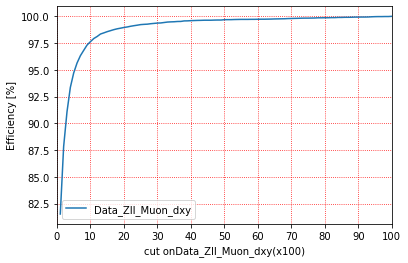

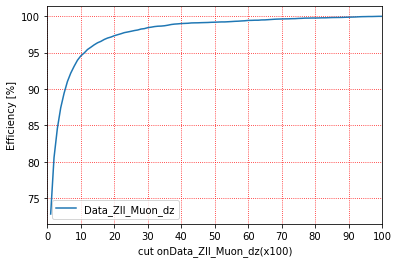

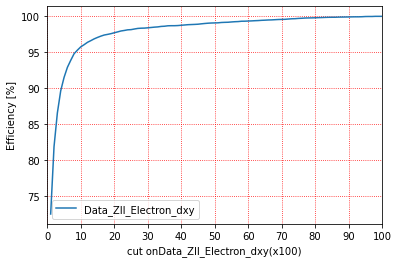

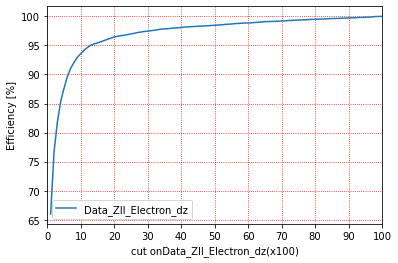

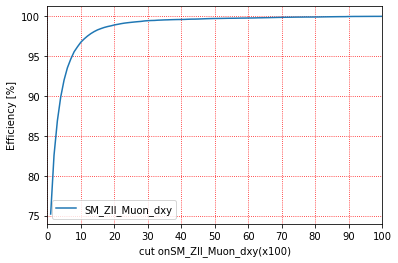

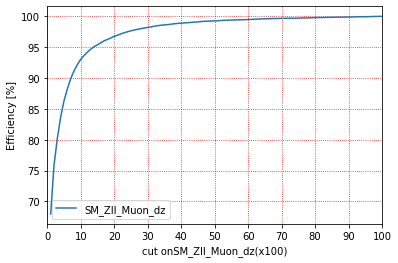

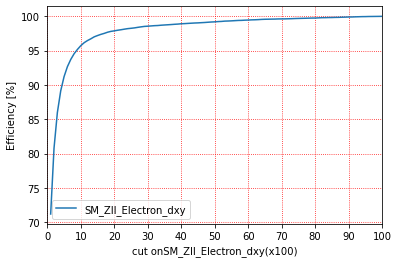

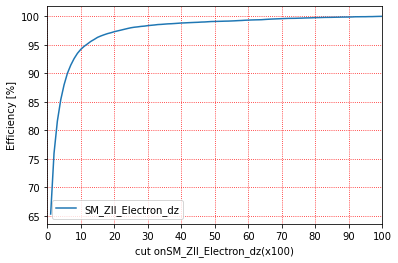

In [12]:
for _histo in histo_list:
    for _cut in cut:
        per_dict[_histo].append(histo_dict[_histo].Integral(0,int(_cut))/counter_list[_histo]*100)
    #end
    plt.plot(cut, per_dict[_histo],label=_histo)
    ax=plt.gca()
    plt.xlabel('cut on'+_histo+'(x100)')
    plt.ylabel('Efficiency [%]')
    plt.xlim(0,100)
    x_major_locator=MultipleLocator(10)
    ax.xaxis.set_major_locator(x_major_locator)
    plt.grid(linestyle=":",color="r", which='major')
    plt.legend()
    plt.show()
#end

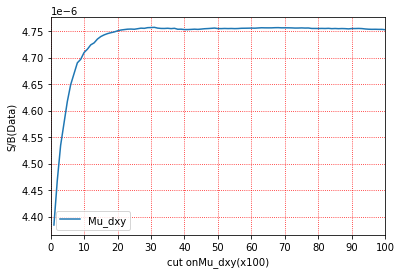

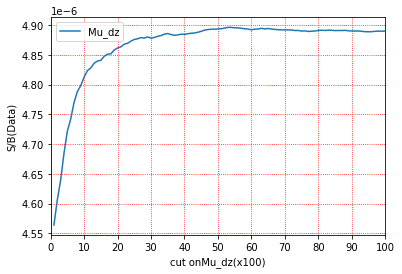

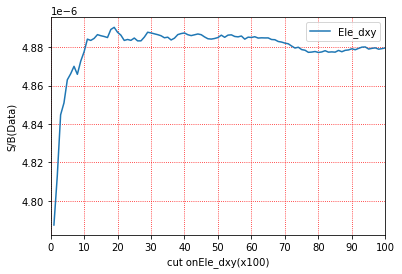

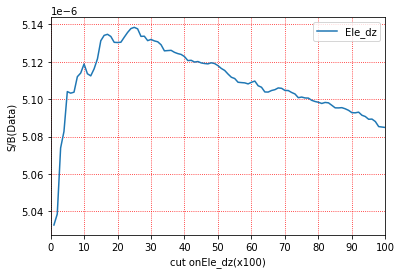

In [15]:
for _var in var_list:
    ind = var_list.index(_var)
    for _cut in cut:
        if histo_dict[histo_list[ind]] .Integral(0, int(_cut)) != 0:
            SvD_dict[_var].append( histo_dict[histo_list[ind+4]] .Integral(0, int(_cut)) / histo_dict[histo_list[ind]] .Integral(0, int(_cut)))
        else:
            SvD_dict[_var].append(0)
            
    plt.plot(cut, SvD_dict[_var],label=_var)
    ax=plt.gca()
    plt.xlabel('cut on'+_var+'(x100)')
    plt.ylabel('S/B(Data)')
    plt.xlim(0,100)
    x_major_locator=MultipleLocator(10)
    ax.xaxis.set_major_locator(x_major_locator)
    plt.grid(linestyle=":",color="r", which='major')
    plt.legend()
    plt.show()

TypeError: none of the 2 overloaded methods succeeded. Full details:
  double TH1::Integral(const char* option = "") =>
    TypeError: takes at most 1 arguments (2 given)
  double TH1::Integral(int binx1, int binx2, const char* option = "") =>
    TypeError: could not convert argument 2 (int/long conversion expects an integer object)

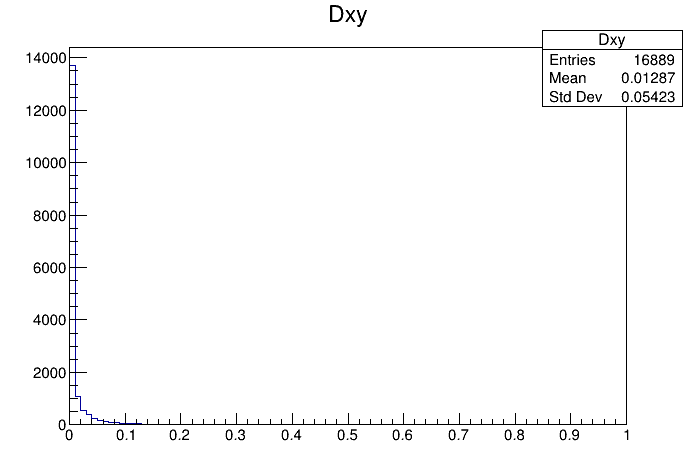

In [74]:
c = R.TCanvas()
c.SetLogy(setlogy)
histo_dict['Data_Zll_Muon_dxy'].Draw()
c.Draw()
print(histo_dict['Data_Zll_Muon_dxy'].Integral(0,cut))

0.036596850112292856


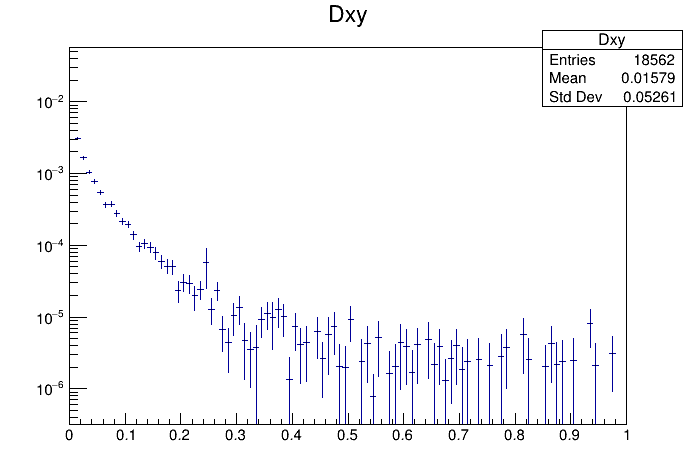

In [10]:
c = R.TCanvas()
c.SetLogy()
histo_dict['Data_Zll_Muon_dxy'].Draw()
c.Draw()
print(histo_dict['Data_Zll_Muon_dxy'].Integral(0,cut))